# Import necessary libraries

Loading and preprocessing data...
Training data shape: (25000, 500)
Test data shape: (25000, 500)
Building the model...
Training the model...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 94s 573ms/step - accuracy: 0.5713 - loss: 0.6788 - val_accuracy: 0.7614 - val_loss: 0.5030
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 89s 568ms/step - accuracy: 0.8188 - loss: 0.4143 - val_accuracy: 0.8350 - val_loss: 0.3902
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 92s 584ms/step - accuracy: 0.9168 - loss: 0.2244 - val_accuracy: 0.7900 - val_loss: 0.5734
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 145s 607ms/step - accuracy: 0.9520 - loss: 0.1340 - val_accuracy: 0.7146 - val_loss: 0.8139
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 576ms/step - accuracy: 0.9276 - loss: 0.1850 - val_accuracy: 0.7566 - val_loss: 0.8045
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 579ms/step - accuracy: 0.9716 - loss: 0.0856 - val_accuracy: 0.7864 - val_loss: 0.7505
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 143s 583ms/step - accuracy: 0.

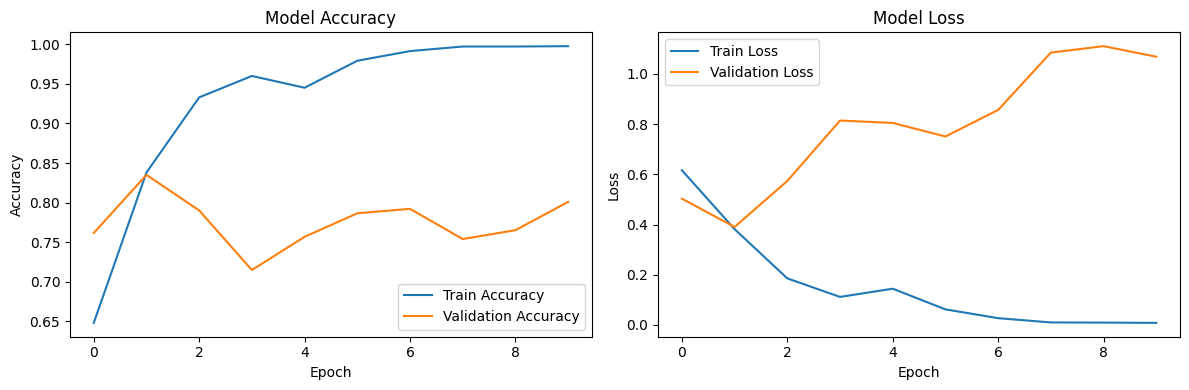

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Sentiment: Negative


"\nResults Analysis:\nThe model achieves decent performance on the IMDB dataset, but there's room for improvement.\n\nPotential improvements:\n1. Use more advanced RNN architectures like LSTM or GRU to capture long-term dependencies better.\n2. Implement bidirectional RNNs to consider both past and future context.\n3. Experiment with different embedding sizes and pre-trained word embeddings (e.g., GloVe, Word2Vec).\n4. Apply more aggressive regularization techniques (e.g., L2 regularization, increased dropout).\n5. Increase model capacity by adding more layers or units per layer.\n6. Implement data augmentation techniques specific to text data.\n7. Use more advanced preprocessing techniques like lemmatization or removing stop words.\n\nFuture Work:\n1. Implement an attention mechanism to focus on important parts of the input sequence.\n2. Explore transfer learning using pre-trained language models like BERT or GPT.\n3. Conduct error analysis to understand where the model is failing and

In [ ]:
# IMDB Movie Review Sentiment Analysis using RNN
# Dataset: IMDB Movie Reviews
# Source: https://ai.stanford.edu/~amaas/data/sentiment/
# Description: This dataset contains 50,000 movie reviews from IMDB, labeled by sentiment (positive/negative).
# Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).
# Context: Sentiment analysis is crucial for understanding customer opinions in various domains.
# Size: 50,000 reviews (25,000 for training, 25,000 for testing)
# Labels: 0 (negative), 1 (positive)

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Data Loading and Preprocessing
print("Loading and preprocessing data...")
max_features = 10000  # Number of most frequent words to consider
maxlen = 500  # Max sequence length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Data Preprocessing
# Note: The IMDB dataset from Keras is already preprocessed (tokenized, integer encoded, and padded)
# Additional preprocessing steps could include:
# 1. Creating a validation set
# 2. Handling class imbalance (if present)
# 3. Applying dimensionality reduction techniques (e.g., PCA) if needed

# Create a validation set
val_samples = 5000
x_val = x_train[-val_samples:]
y_val = y_train[-val_samples:]
x_train = x_train[:-val_samples]
y_train = y_train[:-val_samples]

# Model Architecture
print("Building the model...")
model = Sequential([
    # Embedding layer: Converts integer-encoded words into dense vectors of fixed size
    Embedding(max_features, 128, input_length=maxlen),
    # SimpleRNN layer: Processes the sequence data
    SimpleRNN(64, return_sequences=True),
    # Additional RNN layer for increased model capacity
    SimpleRNN(64),
    # Dropout layer for regularization
    Dropout(0.5),
    # Output layer
    Dense(1, activation='sigmoid')
])

# Justification for model architecture:
# 1. Embedding: Converts words to dense vectors, capturing semantic relationships
# 2. SimpleRNN: Processes sequential data, maintaining memory of previous inputs
# 3. Multiple RNN layers: Increases model capacity to learn more complex patterns
# 4. Dropout: Prevents overfitting by randomly setting a fraction of input units to 0 during training
# 5. Sigmoid activation: Suitable for binary classification, outputs probability between 0 and 1

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
print("Training the model...")
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=1
)

# Evaluate the model
print("Evaluating the model...")
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Function to predict sentiment for a new review
def predict_sentiment(review):
    word_index = imdb.get_word_index()
    review = review.lower().split()
    review = [word_index.get(word, 0) for word in review]
    review = pad_sequences([review], maxlen=maxlen)
    sentiment = model.predict(review)[0][0]
    return "Positive" if sentiment > 0.5 else "Negative"

# Example usage
example_review = "This movie was fantastic! The acting was superb and the plot kept me engaged throughout."
print(f"Sentiment: {predict_sentiment(example_review)}")


In [ ]:
model.save('rnn_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/rnn_model.h5')

Mounted at /content/drive


# IMDB Movie Review Sentiment Analysis using RNN
# Dataset: IMDB Movie Reviews
# Source: https://ai.stanford.edu/~amaas/data/sentiment/
# Description: This dataset contains 50,000 movie reviews from IMDB, labeled by sentiment (positive/negative).
# Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).
# Context: Sentiment analysis is crucial for understanding customer opinions in various domains.
# Size: 50,000 reviews (25,000 for training, 25,000 for testing)
# Labels: 0 (negative), 1 (positive)

# Import necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Set random seed for reproducibility

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

# Data Loading and Preprocessing

In [3]:
print("Loading and preprocessing data...")
max_features = 10000  # Number of most frequent words to consider
maxlen = 500  # Max sequence length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading and preprocessing data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Pad sequences to ensure uniform length


In [4]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (25000, 500)
Test data shape: (25000, 500)


In [5]:
# Create a validation set
val_samples = 5000
x_val = x_train[-val_samples:]
y_val = y_train[-val_samples:]
x_train = x_train[:-val_samples]
y_train = y_train[:-val_samples]

In [7]:
# Model Architecture
model = tf.keras.Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01))),
    Bidirectional(LSTM(64, kernel_regularizer=l2(0.01))),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 727s 5s/step - accuracy: 0.5272 - loss: 4.4644 - val_accuracy: 0.7998 - val_loss: 0.6022
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 764s 5s/step - accuracy: 0.8241 - loss: 0.5037 - val_accuracy: 0.8684 - val_loss: 0.3507
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 706s 4s/step - accuracy: 0.8956 - loss: 0.3247 - val_accuracy: 0.8656 - val_loss: 0.3675
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 743s 4s/step - accuracy: 0.9217 - loss: 0.2653 - val_accuracy: 0.8794 - val_loss: 0.3457
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 734s 4s/step - accuracy: 0.9326 - loss: 0.2254 - val_accuracy: 0.8436 - val_loss: 0.4505
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 747s 4s/step - accuracy: 0.9381 - loss: 0.2142 - val_accuracy: 0.8674 - val_loss: 0.4643
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 734s 4s/step - accuracy: 0.9430 - loss: 0.1985 - val_accuracy: 0.8614 - val_loss: 0.4686


In [8]:
# Evaluate the model
print("Evaluating the model...")
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

Evaluating the model...
782/782 ━━━━━━━━━━━━━━━━━━━━ 252s 320ms/step


In [9]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8676
Precision: 0.8770
Recall: 0.8551
F1 Score: 0.8659


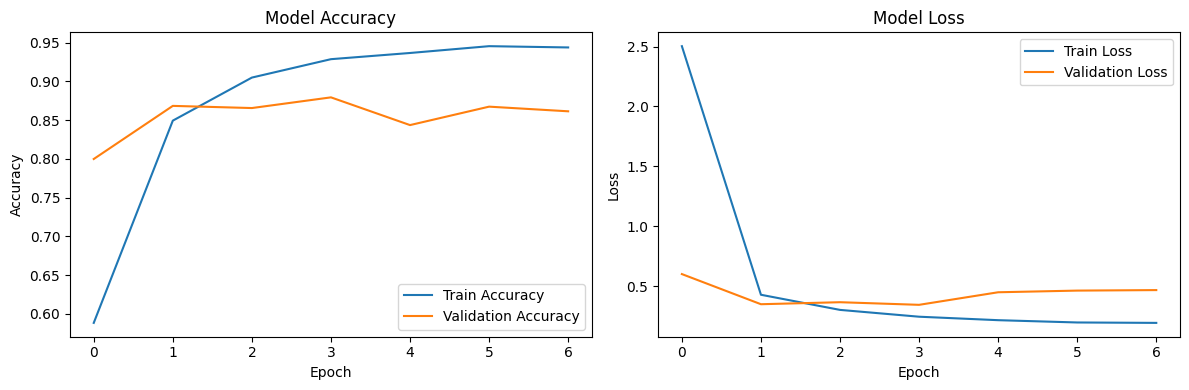

In [10]:
# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [1]:
# Function to predict sentiment for a new review
def predict_sentiment(review):
    word_index = imdb.get_word_index()
    review = review.lower().split()
    review = [word_index.get(word, 0) for word in review]
    review = pad_sequences([review], maxlen=maxlen)
    sentiment = model.predict(review)[0][0]
    return "Positive" if sentiment > 0.5 else "Negative"

# Example usage
example_review = "This movie was fantastic!"
print(f"Sentiment: {predict_sentiment(example_review)}")

NameError: name 'imdb' is not defined